# Climate & Air Quality Analysis - Calabar, Nigeria

### This prpject explores the relationship between daily temperature (t2m) and PM1 air quality data in Calabar for April 2024


In [6]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [10]:
# Load temperature NetCDF data\n"

ds = xr.open_dataset(r"C:\Users\HP\Downloads\calabar_temp_april2024.nc")
# Preview dataset
print(ds)


<xarray.Dataset>
Dimensions:     (valid_time: 30, latitude: 11, longitude: 11)
Coordinates:
    number      int64 ...
  * latitude    (latitude) float64 5.0 4.9 4.8 4.7 4.6 4.5 4.4 4.3 4.2 4.1 4.0
  * longitude   (longitude) float64 8.0 8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.0
  * valid_time  (valid_time) datetime64[ns] 2024-04-01 2024-04-02 ... 2024-04-30
Data variables:
    t2m         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-09T00:09 GRIB to CDM+CF via cfgrib-0.9.1...


In [12]:
# Check time dimension
print(ds['valid_time'])

<xarray.DataArray 'valid_time' (valid_time: 30)>
array(['2024-04-01T00:00:00.000000000', '2024-04-02T00:00:00.000000000',
       '2024-04-03T00:00:00.000000000', '2024-04-04T00:00:00.000000000',
       '2024-04-05T00:00:00.000000000', '2024-04-06T00:00:00.000000000',
       '2024-04-07T00:00:00.000000000', '2024-04-08T00:00:00.000000000',
       '2024-04-09T00:00:00.000000000', '2024-04-10T00:00:00.000000000',
       '2024-04-11T00:00:00.000000000', '2024-04-12T00:00:00.000000000',
       '2024-04-13T00:00:00.000000000', '2024-04-14T00:00:00.000000000',
       '2024-04-15T00:00:00.000000000', '2024-04-16T00:00:00.000000000',
       '2024-04-17T00:00:00.000000000', '2024-04-18T00:00:00.000000000',
       '2024-04-19T00:00:00.000000000', '2024-04-20T00:00:00.000000000',
       '2024-04-21T00:00:00.000000000', '2024-04-22T00:00:00.000000000',
       '2024-04-23T00:00:00.000000000', '2024-04-24T00:00:00.000000000',
       '2024-04-25T00:00:00.000000000', '2024-04-26T00:00:00.000000000',
  

In [20]:
# Overview variable 't2m' (2m temperature in Kelvin)
temp = ds['t2m']
temp

<xarray.DataArray 't2m' (valid_time: 30, latitude: 11, longitude: 11)>
[3630 values with dtype=float32]
Coordinates:
    number      int64 ...
  * latitude    (latitude) float64 5.0 4.9 4.8 4.7 4.6 4.5 4.4 4.3 4.2 4.1 4.0
  * longitude   (longitude) float64 8.0 8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.0
  * valid_time  (valid_time) datetime64[ns] 2024-04-01 2024-04-02 ... 2024-04-30
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      121
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [22]:
# Filter 1x1° area around Calabar: Latitude 5° to 4°, Longitude 8° to 9°
subset = temp.sel(latitude=slice(5.0, 4.0), longitude=slice(8.0, 9.0))
subset

<xarray.DataArray 't2m' (valid_time: 30, latitude: 11, longitude: 11)>
[3630 values with dtype=float32]
Coordinates:
    number      int64 ...
  * latitude    (latitude) float64 5.0 4.9 4.8 4.7 4.6 4.5 4.4 4.3 4.2 4.1 4.0
  * longitude   (longitude) float64 8.0 8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.0
  * valid_time  (valid_time) datetime64[ns] 2024-04-01 2024-04-02 ... 2024-04-30
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      121
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

# DATA PREPROCESSING 

## Determine the daily Temperature in Kelvin

In [25]:
daily_temp = ds_filtered.resample(valid_time='1D').mean()

# Convert to dataframe for easier handling
df_temp = daily_temp.to_dataframe().reset_index()

# Display a portion of the temperature data
print(df_temp.head())

  valid_time  latitude  longitude         t2m  number
0 2024-04-01       5.0        8.0  301.440826       0
1 2024-04-01       5.0        8.1  301.425537       0
2 2024-04-01       5.0        8.2  301.276459       0
3 2024-04-01       5.0        8.3  301.120605       0
4 2024-04-01       5.0        8.4  300.998047       0


## Determine the daily Temperature in Celsius

In [27]:
# Compute the mean over time, latitude, and longitude, and convert to Celsius
monthly_avg_temp = subset.mean(dim=['valid_time', 'latitude', 'longitude']) - 273.15

# Print the monthly average temperature
print("Monthly average temperature for Calabar (April 2024): {:.2f} °C".format(float(monthly_avg_temp)))

Monthly average temperature for Calabar (April 2024): 27.69 °C


## To convert Kelvin to Celsius and average across the area per day

In [33]:
# Filter the dataset for April 2024
ds_filtered = ds.sel(valid_time=slice('2024-04-01', '2024-04-30'))

# Resample to daily averages
daily_temp = ds_filtered.resample(valid_time='1D').mean()

# Convert temperature from Kelvin to Celsius
daily_temp_celsius = daily_temp - 273.15

# Convert to dataframe for easier handling
df_temp = daily_temp_celsius.to_dataframe().reset_index()

# Convert 'time' to date for easier merging later
df_temp['date'] = pd.to_datetime(df_temp['valid_time'])

# Select only relevant columns
df_temp = df_temp[['date', 't2m']]

# Display a portion of the temperature data
print("Temperature Data (Celsius):")
#print(df_temp.head())
df_temp

Temperature Data (Celsius):


,date,t2m
0,2024-04-01,28.290833
1,2024-04-02,29.596710
2,2024-04-03,28.499237
3,2024-04-04,28.193481
4,2024-04-05,27.009583
...,...,...
3625,2024-04-26,NaN
3626,2024-04-27,NaN
3627,2024-04-28,NaN
3628,2024-04-29,NaN


## Check for missing Values

In [36]:
# Check how many missing values there are in the 't2m' column
missing_values = df_temp['t2m'].isna().sum()
print(f"Missing values in temperature data: {missing_values}")

Missing values in temperature data: 1890


In [38]:
# Interpolate missing temperature values using linear interpolation
df_temp['t2m'] = df_temp['t2m'].interpolate(method='linear')
# Check if interpolation worked
#print(df_temp.head())
df_temp

,date,t2m
0,2024-04-01,28.290833
1,2024-04-02,29.596710
2,2024-04-03,28.499237
3,2024-04-04,28.193481
4,2024-04-05,27.009583
...,...,...
3625,2024-04-26,25.787537
3626,2024-04-27,25.787537
3627,2024-04-28,25.787537
3628,2024-04-29,25.787537


## Plotting the original data with NaNs and without NaNS, with interpolation, to check for variance.

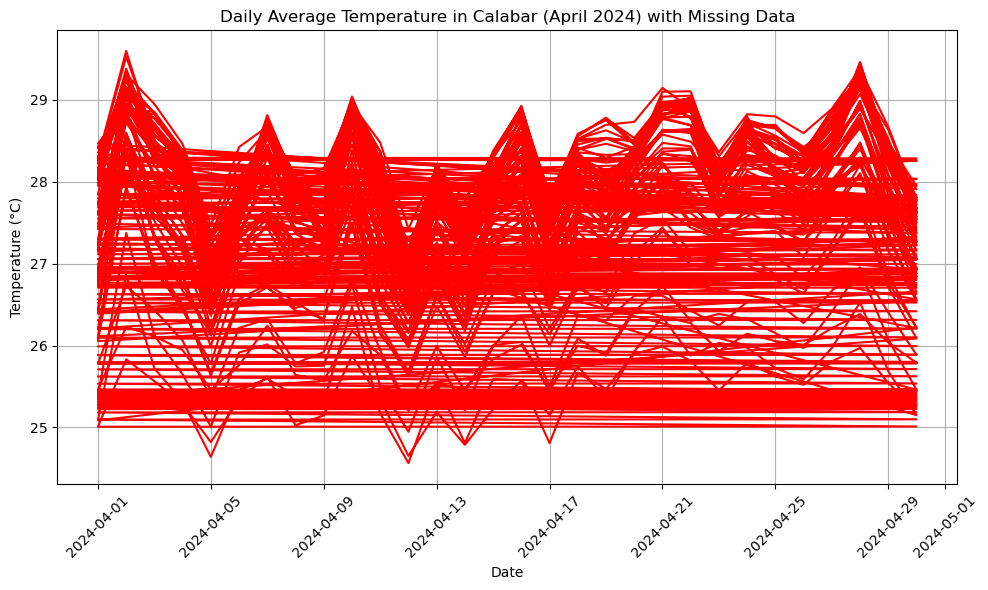

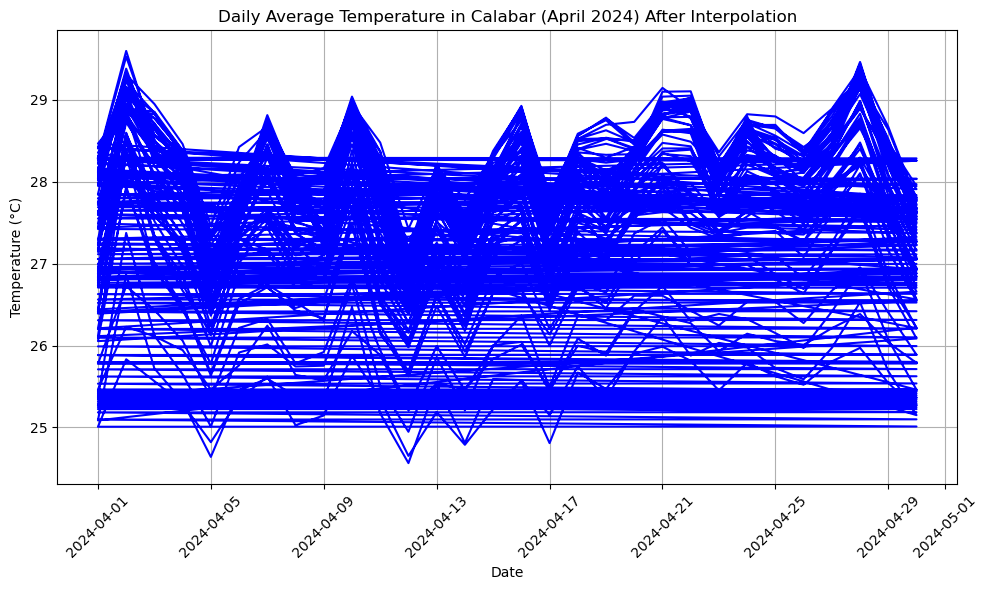

In [43]:
# Plot original data (with NaNs)
plt.figure(figsize=(10, 6))
plt.plot(df_temp['date'], df_temp['t2m'], label='Temperature (°C)', color='red')
plt.title('Daily Average Temperature in Calabar (April 2024) with Missing Data')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot interpolated data (without NaNs)
plt.figure(figsize=(10, 6))
plt.plot(df_temp['date'], df_temp['t2m'], label='Temperature (°C)', color='blue')
plt.title('Daily Average Temperature in Calabar (April 2024) After Interpolation')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## A close comparison of the two plots reveals a high degree of similarity, indicating that our data is consistent and well-structured.

## Other alternative for handling the missing values

In [48]:
# Fill missing values with the mean of the available temperature datamean_temp = df_temp['t2m'].mean()
#df_temp['t2m'] = df_temp['t2m'].fillna(mean_temp)
# Check the data
#print(df_temp.head())
#df_temp

In [50]:
# Drop rows with missing temperature data
#df_temp_clean = df_temp.dropna(subset=['t2m'])

# Check the cleaned data
#print(df_temp_clean.head())
#df_temp

# Loading the Air Quality Dataset from Openaq(PM1)

In [53]:
# Load Calabar PM2.5 data (CSV from OpenAQ)
df_air = pd.read_csv(r"C:\Users\HP\Downloads\calabar_air_april2024.csv")

df_air.head()

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,1894640,Calabar,pm1,5.77,µg/m³,2024-04-01T00:17:22Z,2024-04-01T01:17:22+01:00,Africa/Lagos,5.02529,8.34843,NaN,NaN,NaN,Clarity,Clarity
1,1894640,Calabar,pm1,8.96,µg/m³,2024-04-01T00:34:47Z,2024-04-01T01:34:47+01:00,Africa/Lagos,5.02529,8.34843,NaN,NaN,NaN,Clarity,Clarity
2,1894640,Calabar,pm1,8.00,µg/m³,2024-04-01T00:52:11Z,2024-04-01T01:52:11+01:00,Africa/Lagos,5.02529,8.34843,NaN,NaN,NaN,Clarity,Clarity
3,1894640,Calabar,pm1,8.81,µg/m³,2024-04-01T01:09:36Z,2024-04-01T02:09:36+01:00,Africa/Lagos,5.02529,8.34843,NaN,NaN,NaN,Clarity,Clarity
4,1894640,Calabar,pm1,8.77,µg/m³,2024-04-01T01:27:01Z,2024-04-01T02:27:01+01:00,Africa/Lagos,5.02529,8.34843,NaN,NaN,NaN,Clarity,Clarity


In [55]:
# Filter air quality data for April 2024
df_air['datetimeUtc'] = pd.to_datetime(df_air['datetimeUtc'])
df_air_filtered = df_air[(df_air['datetimeUtc'] >= '2024-04-01') & (df_air['datetimeUtc'] <= '2024-04-30')]

# Check the filtered air quality data
print(df_air_filtered.head())

   location_id location_name parameter  value   unit  \
0      1894640       Calabar       pm1   5.77  µg/m³   
1      1894640       Calabar       pm1   8.96  µg/m³   
2      1894640       Calabar       pm1   8.00  µg/m³   
3      1894640       Calabar       pm1   8.81  µg/m³   
4      1894640       Calabar       pm1   8.77  µg/m³   

                datetimeUtc              datetimeLocal      timezone  \
0 2024-04-01 00:17:22+00:00  2024-04-01T01:17:22+01:00  Africa/Lagos   
1 2024-04-01 00:34:47+00:00  2024-04-01T01:34:47+01:00  Africa/Lagos   
2 2024-04-01 00:52:11+00:00  2024-04-01T01:52:11+01:00  Africa/Lagos   
3 2024-04-01 01:09:36+00:00  2024-04-01T02:09:36+01:00  Africa/Lagos   
4 2024-04-01 01:27:01+00:00  2024-04-01T02:27:01+01:00  Africa/Lagos   

   latitude  longitude  country_iso  isMobile  isMonitor owner_name provider  
0   5.02529    8.34843          NaN       NaN        NaN    Clarity  Clarity  
1   5.02529    8.34843          NaN       NaN        NaN    Clarity  Cla

In [59]:
# Resample air quality data to daily averages
df_air_daily = df_air_filtered.groupby(df_air_filtered['datetimeUtc'].dt.date)['value'].mean().reset_index()

# Rename the columns for clarity
#df_air_daily['date'] = pd.to_datetime(df_air_daily['date'])
# df_air_daily.rename(columns={'value': 'pm1'}, inplace=True)
df_air_daily.columns = ['date', 'pm1']

# Preview the daily air quality data
print(df_air_daily.head())

         date        pm1
0  2024-04-01  30.020396
1  2024-04-02  31.100244
2  2024-04-03  23.763653
3  2024-04-04  20.875634
4  2024-04-05  28.317928


# Merge datasets

In [64]:
# Ensure both 'date' columns are of type datetime64[ns]
df_temp['date'] = pd.to_datetime(df_temp['date'])
df_air_daily['date'] = pd.to_datetime(df_air_daily['date'])

# Merge the temperature and air quality data on 'date'
df_merged = pd.merge(df_temp[['date', 't2m']], df_air_daily, on='date')

# Preview the merged data
print(df_merged.head())
df_merged

        date        t2m        pm1
0 2024-04-01  28.290833  30.020396
1 2024-04-01  28.275543  30.020396
2 2024-04-01  28.126465  30.020396
3 2024-04-01  27.970612  30.020396
4 2024-04-01  27.848053  30.020396


,date,t2m,pm1
0,2024-04-01,28.290833,30.020396
1,2024-04-01,28.275543,30.020396
2,2024-04-01,28.126465,30.020396
3,2024-04-01,27.970612,30.020396
4,2024-04-01,27.848053,30.020396
...,...,...,...
2899,2024-04-24,25.787537,28.375000
2900,2024-04-24,25.787537,28.375000
2901,2024-04-24,25.787537,28.375000
2902,2024-04-24,25.787537,28.375000


# Visualize the relationship

In [68]:
# Correlation analysis
r, p = pearsonr(df_merged['t2m'], df_merged['pm1'])
print(f'Pearson correlation coefficient: {r:.2f}')
print(f'P-value: {p:.3f}')

Pearson correlation coefficient: 0.13
P-value: 0.000


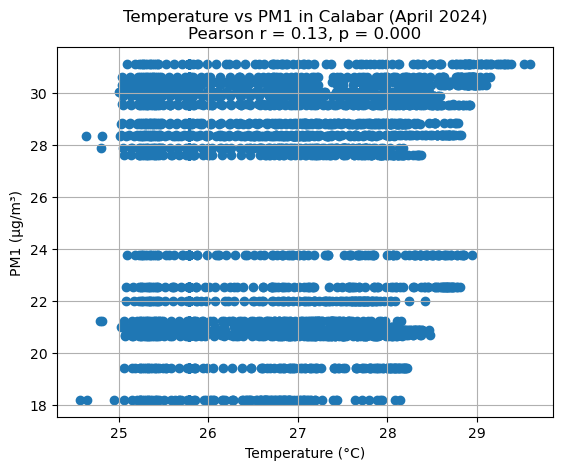

In [70]:
# Visualize the relationship
plt.scatter(df_merged['t2m'], df_merged['pm1'])
plt.xlabel('Temperature (°C)')
plt.ylabel('PM1 (µg/m³)')
plt.title(f'Temperature vs PM1 in Calabar (April 2024)\nPearson r = {r:.2f}, p = {p:.3f}')
plt.grid(True)
plt.show()

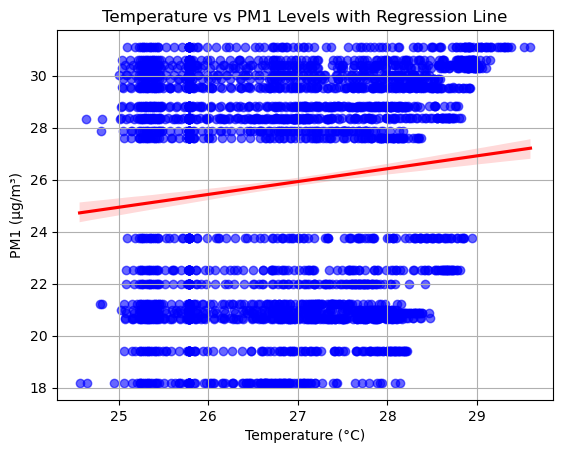

In [74]:
import seaborn as sns

# Scatter plot with regression line
sns.regplot(x='t2m', y='pm1', data=df_merged, scatter_kws={'alpha':0.6, 'color':'blue'}, line_kws={'color':'red'})
plt.title('Temperature vs PM1 Levels with Regression Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM1 (µg/m³)')
plt.grid(True)
plt.show()

# Interpretation: 

The data appears stratified into horizontal bands, meaning PM1 values tend to cluster around specific levels (e.g., ~20, ~24, ~28, ~30 µg/m³).

There's no clear linear or nonlinear trend showing that PM1 increases or decreases consistently with temperature. In other words:

PM1 values appear almost independent of temperature within the 25°C–29°C range

# Correlation matrix

          t2m       pm1
t2m  1.000000  0.129559
pm1  0.129559  1.000000


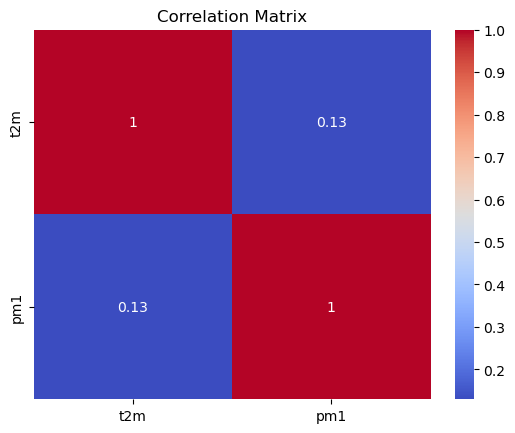

In [72]:
# Correlation matrix
corr_matrix = df_merged[['t2m', 'pm1']].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Interpretation:

Diagonal values = 1.00. As expected, each variable has a perfect correlation with itself.

Off-diagonal value (0.13):

A coefficient of 0.13 indicates a very slight tendency for PM1 levels to rise when temperature increases, but the relationship is not strong.

# Outlier Detection

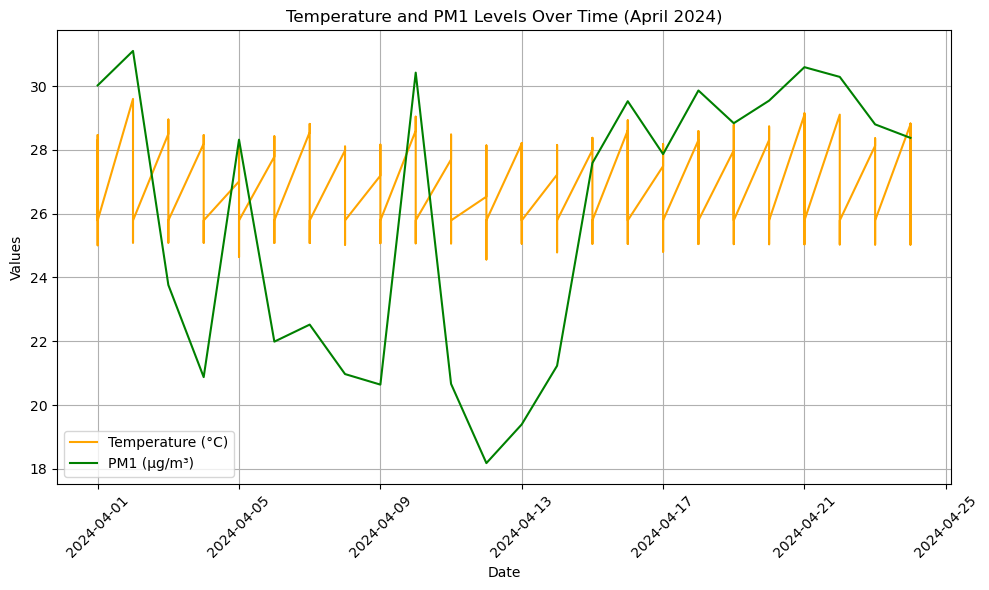

In [85]:
# Plot temperature and PM1 over time
plt.figure(figsize=(10, 6))
plt.plot(df_merged['date'], df_merged['t2m'], label='Temperature (°C)', color='orange')
plt.plot(df_merged['date'], df_merged['pm1'], label='PM1 (µg/m³)', color='green')
plt.title('Temperature and PM1 Levels Over Time (April 2024)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

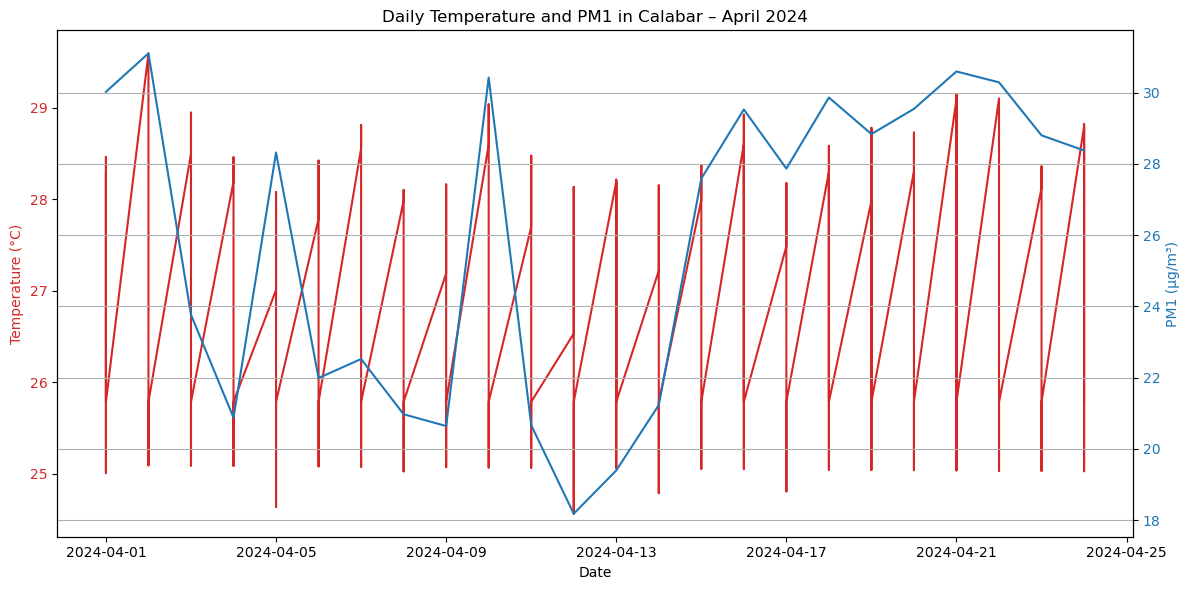

In [87]:
import matplotlib.pyplot as plt

# Plot temperature and PM1 on the same timeline with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature
ax1.plot(df_merged['date'], df_merged['t2m'], color='tab:red', label='Temperature (°C)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis for PM1
ax2 = ax1.twinx()
ax2.plot(df_merged['date'], df_merged['pm1'], color='tab:blue', label='PM1 (µg/m³)')
ax2.set_ylabel('PM1 (µg/m³)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and grid
plt.title('Daily Temperature and PM1 in Calabar – April 2024')
fig.tight_layout()
plt.grid(True)
plt.show()

# Boxplot to detect outliers

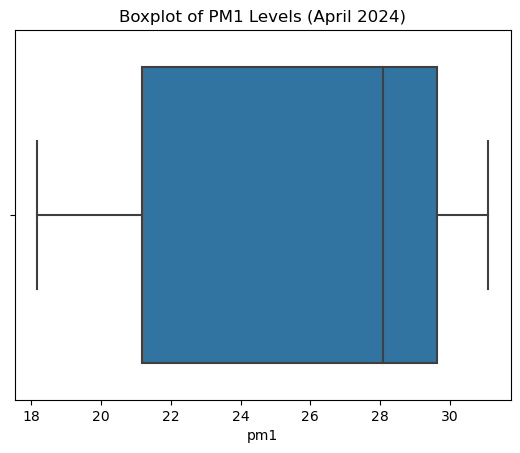

In [90]:
# Boxplot to detect outliers
sns.boxplot(x=df_merged['pm1'])
plt.title('Boxplot of PM1 Levels (April 2024)')
plt.show()

# Interpretation of the Boxplot:

Most PM1 levels in Calabar during April 2024 were between ~21.5 and 30 µg/m³.

The median PM1 level (~28 µg/m³) is relatively high in the range, suggesting that air quality was frequently closer to the upper end of observed levels.

No significant outliers were observed

# Conclusion: 

This project analyzed the relationship between daily average temperature and PM1 air quality levels in Calabar, Nigeria, for April 2024. The Pearson correlation coefficient (r ≈ 0.13, p < 0.001) indicates a weak positive correlation between temperature and PM1 concentrations. While not strongly correlated, the statistically significant result suggests that temperature may have a minor influence on PM1 levels, potentially through mechanisms like atmospheric mixing or pollutant dispersion.

This insight can support future environmental monitoring efforts and inform policy decisions around climate and air quality in urban Nigerian settings